<a href="https://colab.research.google.com/github/sameer999/CSEE-5590-Python-Deep_Learning/blob/master/python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')


movies = pd.read_csv("movies.csv")
print(movies.keys())
#print(movies)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Index(['rank', 'title', 'genre', 'wiki_plot', 'imdb_plot'], dtype='object')


In [0]:

movies["plot"] = movies["wiki_plot"].astype(str) + "\n" + movies["imdb_plot"].astype(str)

print(movies.head())
print(movies['plot'])

   rank                     title                                    genre  \
0     0             The Godfather                   [u' Crime', u' Drama']   
1     1  The Shawshank Redemption                   [u' Crime', u' Drama']   
2     2          Schindler's List  [u' Biography', u' Drama', u' History']   
3     3               Raging Bull    [u' Biography', u' Drama', u' Sport']   
4     4                Casablanca        [u' Drama', u' Romance', u' War']   

                                           wiki_plot  \
0  On the day of his only daughter's wedding, Vit...   
1  In 1947, banker Andy Dufresne is convicted of ...   
2  In 1939, the Germans move Polish Jews into the...   
3  In a brief scene in 1964, an aging, overweight...   
4  It is early December 1941. American expatriate...   

                                           imdb_plot  \
0  In late summer 1945, guests are gathered for t...   
1  In 1947, Andy Dufresne (Tim Robbins), a banker...   
2  The relocation of Polis

In [0]:
s_tokens = [s for s in nltk.sent_tokenize("""In late summer 1945, guests 
are gathered for the wedding reception of Don Vito Corleone's daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo).""")]

w_tokens = [w for w in nltk.word_tokenize(s_tokens[0])]

import re

filtered_w_tokens = [w for w in w_tokens if re.search('[a-zA-Z]', w)]

print(filtered_w_tokens)

['In', 'late', 'summer', 'guests', 'are', 'gathered', 'for', 'the', 'wedding', 'reception', 'of', 'Don', 'Vito', 'Corleone', "'s", 'daughter', 'Connie', 'Talia', 'Shire', 'and', 'Carlo', 'Rizzi', 'Gianni', 'Russo']


In [0]:
from nltk.stem.snowball import SnowballStemmer

snowball = SnowballStemmer("english")

print("before stemming:", filtered_w_tokens)

stemmed_w_tokens = [snowball.stem(w) for w in filtered_w_tokens]

print("after stemming:", stemmed_w_tokens)

before stemming: ['In', 'late', 'summer', 'guests', 'are', 'gathered', 'for', 'the', 'wedding', 'reception', 'of', 'Don', 'Vito', 'Corleone', "'s", 'daughter', 'Connie', 'Talia', 'Shire', 'and', 'Carlo', 'Rizzi', 'Gianni', 'Russo']
after stemming: ['in', 'late', 'summer', 'guest', 'are', 'gather', 'for', 'the', 'wed', 'recept', 'of', 'don', 'vito', 'corleon', "'s", 'daughter', 'conni', 'talia', 'shire', 'and', 'carlo', 'rizzi', 'gianni', 'russo']


In [0]:
def tokenizing_and_stemming(text):
    
    w_tokens = [w for s in nltk.sent_tokenize(text) for w in nltk.word_tokenize(s)]
    
    filtered_w_tokens = [w for w in w_tokens if re.search('[a-zA-Z]', w)]
    
    stemmed_w_tokens = [snowball.stem(w) for w in filtered_w_tokens ]
    
    return stemmed_w_tokens

stemmed_words = tokenizing_and_stemming("""In late summer 1945, guests 
are gathered for the wedding reception of Don Vito Corleone's daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo).""")
print(stemmed_words)

['in', 'late', 'summer', 'guest', 'are', 'gather', 'for', 'the', 'wed', 'recept', 'of', 'don', 'vito', 'corleon', "'s", 'daughter', 'conni', 'talia', 'shire', 'and', 'carlo', 'rizzi', 'gianni', 'russo']


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(min_df=0.25, max_df=0.75, ngram_range=(1,3), stop_words='english', use_idf=True, tokenizer=tokenizing_and_stemming)

In [0]:
tfidf_data = tfidf_vector.fit_transform([y for y in movies['plot']])

print(tfidf_data.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(100, 393)


In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(6)

kmeans.fit(tfidf_data)

kmeans_clusters = kmeans.labels_.tolist()

movies["cluster"] = kmeans_clusters

print(movies['cluster'].value_counts())

3    39
1    23
2    17
0     9
5     7
4     5
Name: cluster, dtype: int64

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_distance = 1 - cosine_similarity(tfidf_data)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster.hierarchy import linkage, dendrogram

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])
[94, 90, 97, 12, 76, 98, 63, 86, 7, 26, 27, 75, 16, 14, 84, 59, 0, 11, 6, 47, 58, 44, 77, 99, 89, 64, 69, 9, 82, 48, 57, 24, 29, 31, 88, 5, 4, 19, 38, 62, 36, 55, 35, 61, 33, 34, 50, 2, 10, 80, 85, 41, 78, 17, 74, 25, 13, 32, 71, 51, 68, 92, 3, 65, 72, 73, 43, 93, 1, 22, 52, 37, 53, 56, 79, 15, 42, 28, 30, 67, 8, 20, 40, 46, 23, 49, 21, 81, 45, 60, 87, 83, 91, 95, 66, 70, 54, 96, 18, 39]
['Double Indemnity', 'The Maltese Falcon', 'The Third Man', 'Psycho', 'Fargo', 'North by Northwest', 'The French Connection', 'Pulp Fiction', 'Citizen Kane', "It's a Wonderful Life", 'Some Like It Hot', 'Tootsie', 'Forrest Gump', 'Vertigo', 'The Graduate', 'Goodfellas', 'The Godfather', 'The Godfather: Part II', 'Gone with the Wind', 'Doctor Zhivago', 'The Pianist', 'The Best Years of Our Lives', 'Giant', 'Yankee Doodle Dandy', 'Mutiny on the Bounty', 'City Lights', 'Mr. Smith Goes to Washington', 'Titanic', 'Network', 'Patton', 'Dances wit

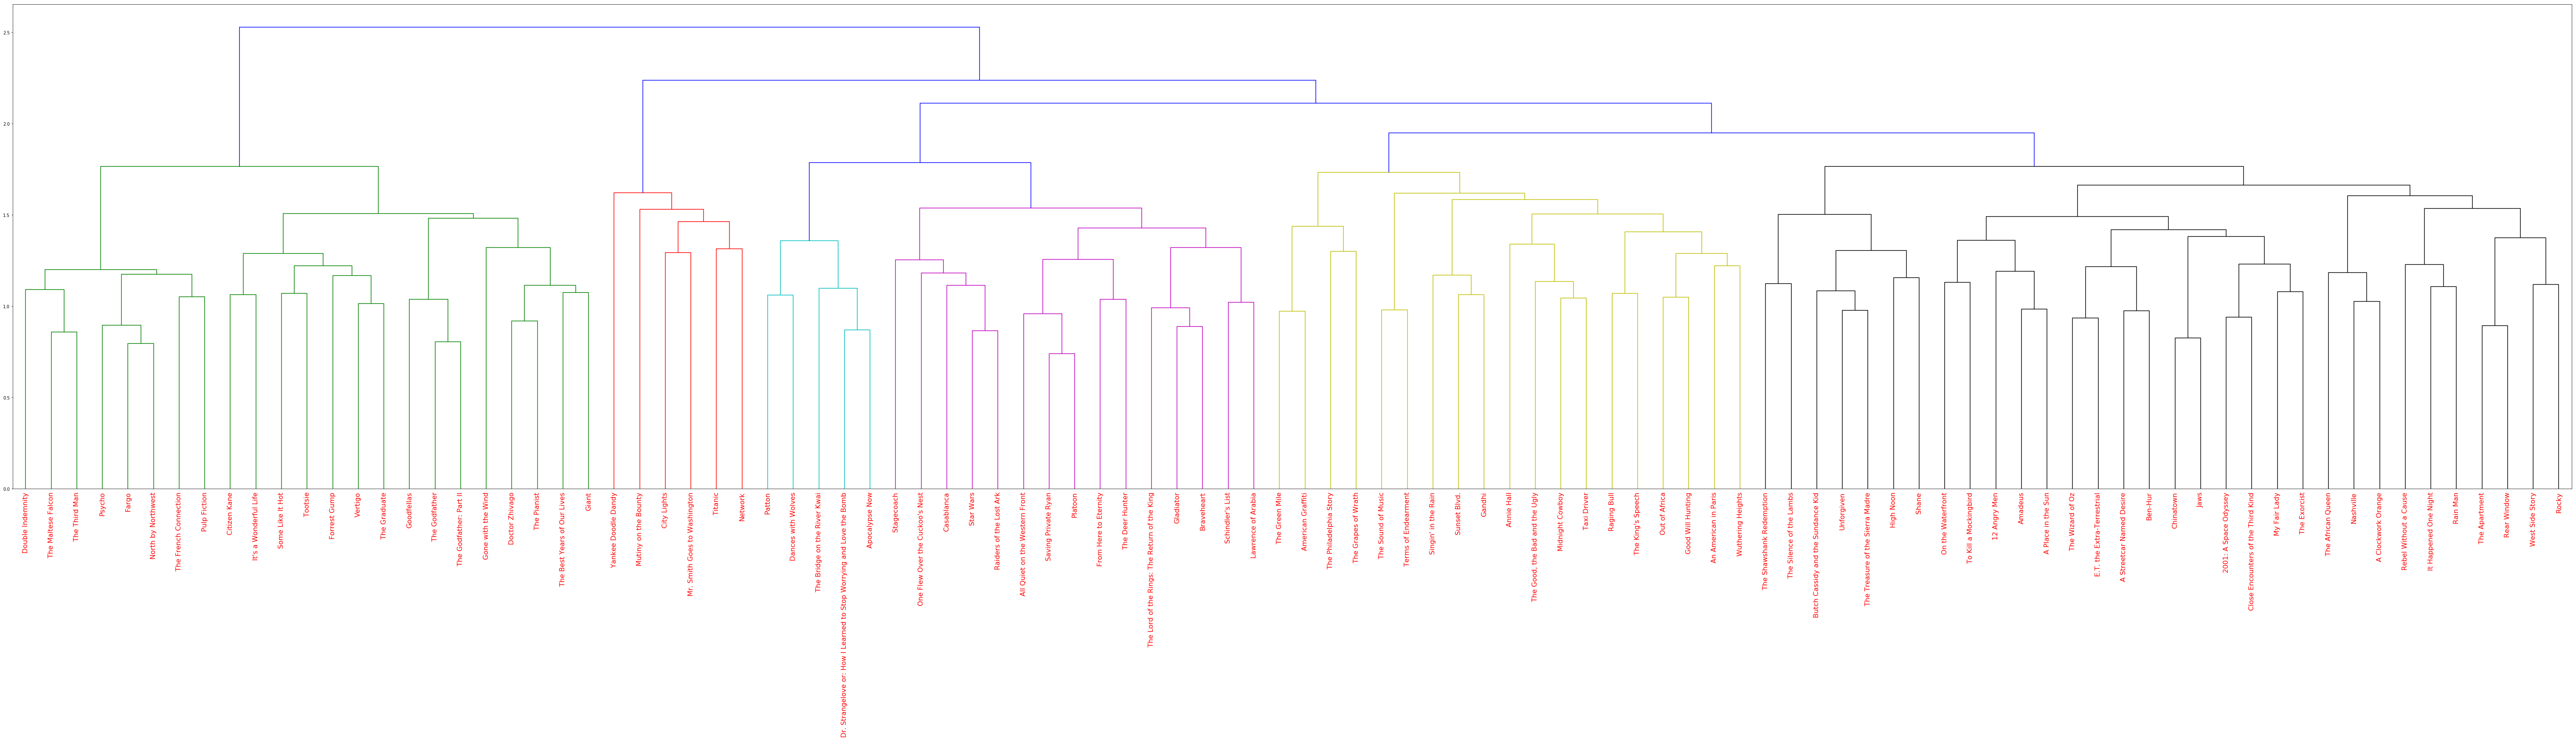

In [0]:
mergings = linkage(similarity_distance, method='complete')

dendrogram_ = dendrogram(mergings, labels=[x for x in movies["title"]], leaf_rotation=90, leaf_font_size=16)

fig = plt.gcf()
x = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)
labels=[x for x in movies["title"]]

print(dendrogram_.keys())
print(dendrogram_['leaves'])
print(dendrogram_['ivl'])


plt.show()